In [12]:
"""
Diego Armando Sarmiento Ahumada
301379640
Unsupervised Learning - Section 001
"""

'\nDiego Armando Sarmiento Ahumada\n301379640\nUnsupervised Learning - Section 001\n'

In [23]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

1. Retrieve and load the Olivetti faces dataset

In [24]:
olivetti_faces = datasets.fetch_olivetti_faces()

In [25]:
X = olivetti_faces.data
y = olivetti_faces.target

2. Split the training set, a validation set, and a test set using stratified sampling to ensure that there are the same number of images per person in each set

In [26]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=40)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=40)

# Print the sizes of the splits to verify
print(f"Training set: {X_train.shape[0]}")
print(f"Validation set: {X_validation.shape[0]}")
print(f"Test set: {X_test.shape[0]}")

Training set: 320
Validation set: 40
Test set: 40


3. Using k-fold cross validation, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.

In [34]:
# Define classifier for KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
kf = KFold(n_splits=8, shuffle=True, random_state=40)

cv_scores = cross_val_score(knn_clf, X_train, y_train, cv=kf)

# Train the classifier
knn_clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = knn_clf.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_pred)

# Print the cross-validation scores and the validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")
print(f"Validation set accuracy: {val_accuracy}")

# Define classifier for Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=40)

cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=kf)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = rf_clf.predict(X_validation)
val_accuracy = accuracy_score(y_validation, y_pred)

# Print the cross-validation scores and the validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")
print(f"Validation set accuracy: {val_accuracy}")

Cross-validation scores: [0.775 0.625 0.825 0.725 0.8   0.775 0.85  0.7  ]
Mean cross-validation score: 0.7593749999999999
Validation set accuracy: 0.85
Cross-validation scores: [0.925 0.875 0.85  0.9   0.95  0.95  0.875 0.9  ]
Mean cross-validation score: 0.903125
Validation set accuracy: 1.0


4. Using Agglomerative Hierarchical Clustering (AHC) and centroid-based clustering rule, reduce the dimensionality of the set by using the following similarity measures:

    a) Euclidean Distance \
    b) Minkowski Distance (set p=1) \
    c) Cosine Similarity

    For each distance measure, perform the following steps:

    Apply AHC to cluster the dataset.
    Plot the corresponding dendrograms for each similarity measure.
    Discuss the differences observed in the clustering behavior based on the different similarity measures.

C:\Users\Asus\AppData\Local\Temp\ipykernel_2304\913197216.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  euclidean = linkage(train_dist_matrix, method='centroid')


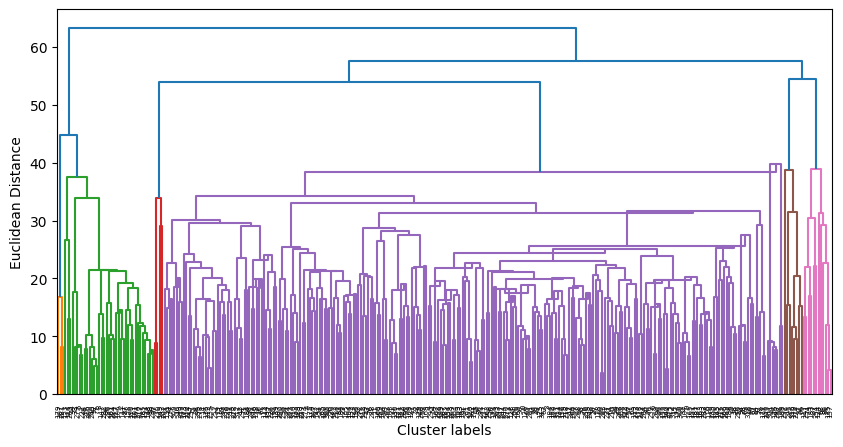

In [28]:
# Calculate the Euclidean distance
train_dist_matrix = squareform(pdist(X_train, metric='euclidean'))

# Agglomerative hierarchical clustering
euclidean = linkage(train_dist_matrix, method='centroid')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(euclidean)
plt.xlabel('Cluster labels')
plt.ylabel('Euclidean Distance')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_2304\2493839064.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  manhattan = linkage(train_dist_matrix, method='average')


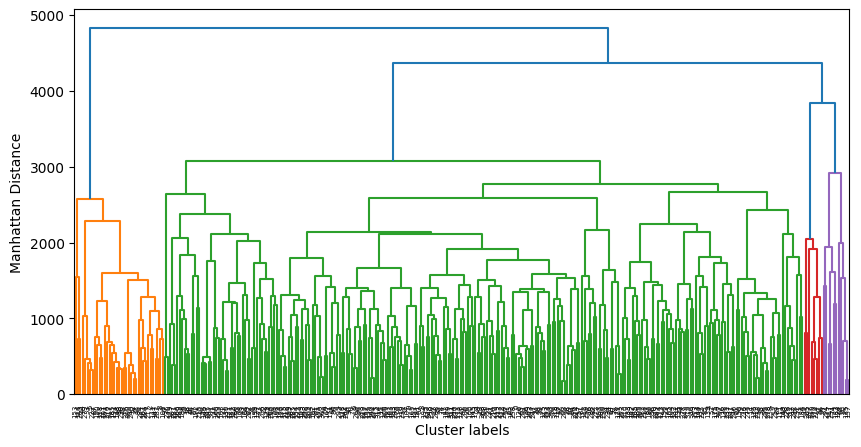

In [29]:
# Calculate the Manhattan distance
train_dist_matrix = squareform(pdist(X_train, metric='minkowski', p=1))

# Agglomerative hierarchical clustering
manhattan = linkage(train_dist_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(manhattan)
plt.xlabel('Cluster labels')
plt.ylabel('Manhattan Distance')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_2304\2577540521.py:5: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  cosine = linkage(train_dist_matrix, method='centroid')


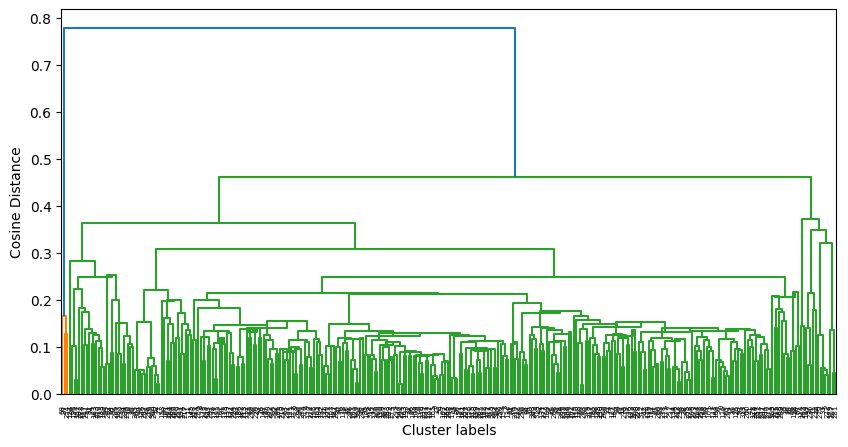

In [30]:
# Calculate the Cosine distance
train_dist_matrix = squareform(pdist(X_train, metric='cosine'))

# Agglomerative hierarchical clustering
cosine = linkage(train_dist_matrix, method='centroid')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(cosine)
plt.xlabel('Cluster labels')
plt.ylabel('Cosine Distance')
plt.show()

5. Use the silhouette score approach to choose the number of clusters for 4(a), 4(b), and 4(c).

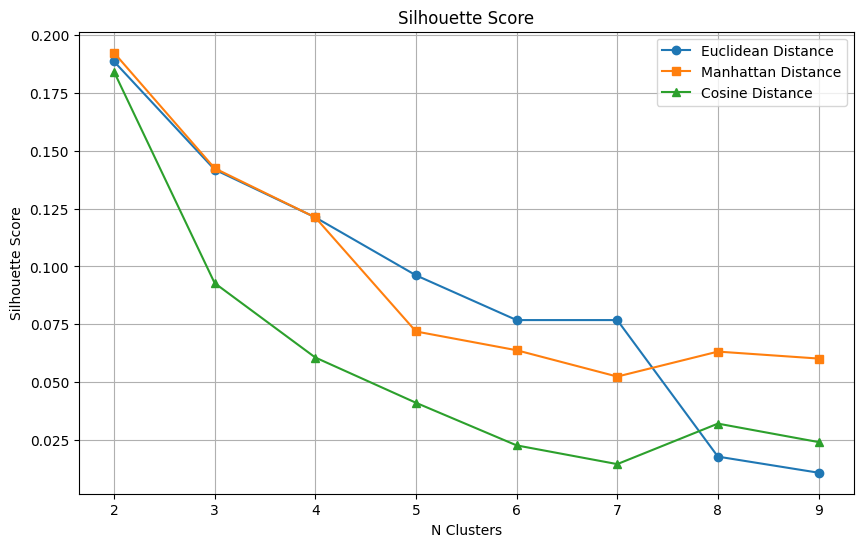

In [31]:
# Calculate the silhouette score
def calculate_silhouette_score(X, AHC, max_clusters=10):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters):
        cluster_labels = fcluster(AHC, n_clusters, criterion='maxclust')
        score = silhouette_score(X, cluster_labels)
        silhouette_scores.append(score)
    return silhouette_scores


# Apply the silhouette score to the three different distances
clusters_euclidean = calculate_silhouette_score(X_train, euclidean) 
clusters_manhattan = calculate_silhouette_score(X_train, manhattan) 
clusters_cosine = calculate_silhouette_score(X_train, cosine)      

# Plot the silhouette score
n_clusters = np.arange(2, 10)

plt.figure(figsize=(10, 6))
plt.plot(n_clusters, clusters_euclidean, marker='o', label='Euclidean Distance')
plt.plot(n_clusters, clusters_manhattan, marker='s', label='Manhattan Distance')
plt.plot(n_clusters, clusters_cosine, marker='^', label='Cosine Distance')
plt.title('Silhouette Score')
plt.xlabel('N Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

6. Use the set from (4(a), 4(b), or 4(c)) to train a classifier as in (3) using k-fold cross validation

In [32]:


ahc_euclidean = AgglomerativeClustering(n_clusters= np.argmax(clusters_euclidean) + 2, metric='euclidean', linkage='ward')
labels_euclidean = ahc_euclidean.fit_predict(X_train)
scores_euclidean = cross_val_score(knn_clf, X_train, labels_euclidean, cv=5)
print(f"Accuracy Euclidean: {scores_euclidean.mean():.2f}")

ahc_manhattan = AgglomerativeClustering(n_clusters=np.argmax(clusters_manhattan) + 25, metric='manhattan', linkage='average')
labels_manhattan = ahc_manhattan.fit_predict(X_train)
scores_manhattan = cross_val_score(knn_clf, X_train, labels_manhattan, cv=5)
print(f"Accuracy Manhattan: {scores_manhattan.mean():.2f}")

ahc_cosine = AgglomerativeClustering(n_clusters=np.argmax(clusters_cosine) + 2, metric='cosine', linkage='average')
labels_cosine = ahc_cosine.fit_predict(X_train)
scores_cosine = cross_val_score(knn_clf, X_train, labels_cosine, cv=5)
print(f"Accuracy Cosine (4c): {scores_cosine.mean():.2f}")

Accuracy Euclidean: 0.99


c:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy Manhattan: 0.85
Accuracy Cosine (4c): 0.99
